In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [2]:
ari_data = pd.read_csv("/home/yyz/SABench/DownstreamTasks/DLPFCS_3D_Spatial_Clustering_metrics/ARI.csv", index_col=0, header=None)  # index_col=0 表示第一列是Method名称
nmi_data = pd.read_csv("/home/yyz/SABench/DownstreamTasks/DLPFCS_3D_Spatial_Clustering_metrics/NMI.csv", index_col=0, header=None)
hom_data = pd.read_csv("/home/yyz/SABench/DownstreamTasks/DLPFCS_3D_Spatial_Clustering_metrics/HOM.csv", index_col=0, header=None)
com_data = pd.read_csv("/home/yyz/SABench/DownstreamTasks/DLPFCS_3D_Spatial_Clustering_metrics/COM.csv", index_col=0, header=None)

def clean_method_name(name):
    return name.replace("_DLPFCS", "") if isinstance(name, str) else name

ari_data.index = ari_data.index.map(clean_method_name)
nmi_data.index = nmi_data.index.map(clean_method_name)
hom_data.index = hom_data.index.map(clean_method_name)
com_data.index = com_data.index.map(clean_method_name)

ari_avg = ari_data.mean(axis=1)
nmi_avg = nmi_data.mean(axis=1)
hom_avg = hom_data.mean(axis=1)
com_avg = com_data.mean(axis=1)

baseline_name = "RAW"
baseline_idx = np.where(ari_avg.index == baseline_name)[0][0]

baseline_ari = ari_avg.iloc[baseline_idx]
baseline_nmi = nmi_avg.iloc[baseline_idx]
baseline_hom = hom_avg.iloc[baseline_idx]
baseline_com = com_avg.iloc[baseline_idx]

ari_diff = ari_avg - baseline_ari
nmi_diff = nmi_avg - baseline_nmi
hom_diff = hom_avg - baseline_hom
com_diff = com_avg - baseline_com

ari_rank = ari_avg.rank(ascending=False, method='max')
nmi_rank = nmi_avg.rank(ascending=False, method='max')
hom_rank = hom_avg.rank(ascending=False, method='max')
com_rank = com_avg.rank(ascending=False, method='max')

mean_rank = -((ari_rank + nmi_rank + hom_rank + com_rank) / 4)
mean_rank_diff = mean_rank - mean_rank.loc[baseline_name]  

sorted_order = mean_rank.sort_values(ascending=True).index
ari_diff_sorted = ari_diff.loc[sorted_order]
nmi_diff_sorted = nmi_diff.loc[sorted_order]
hom_diff_sorted = hom_diff.loc[sorted_order]
com_diff_sorted = com_diff.loc[sorted_order]
mean_rank_diff_sorted = mean_rank_diff.loc[sorted_order]

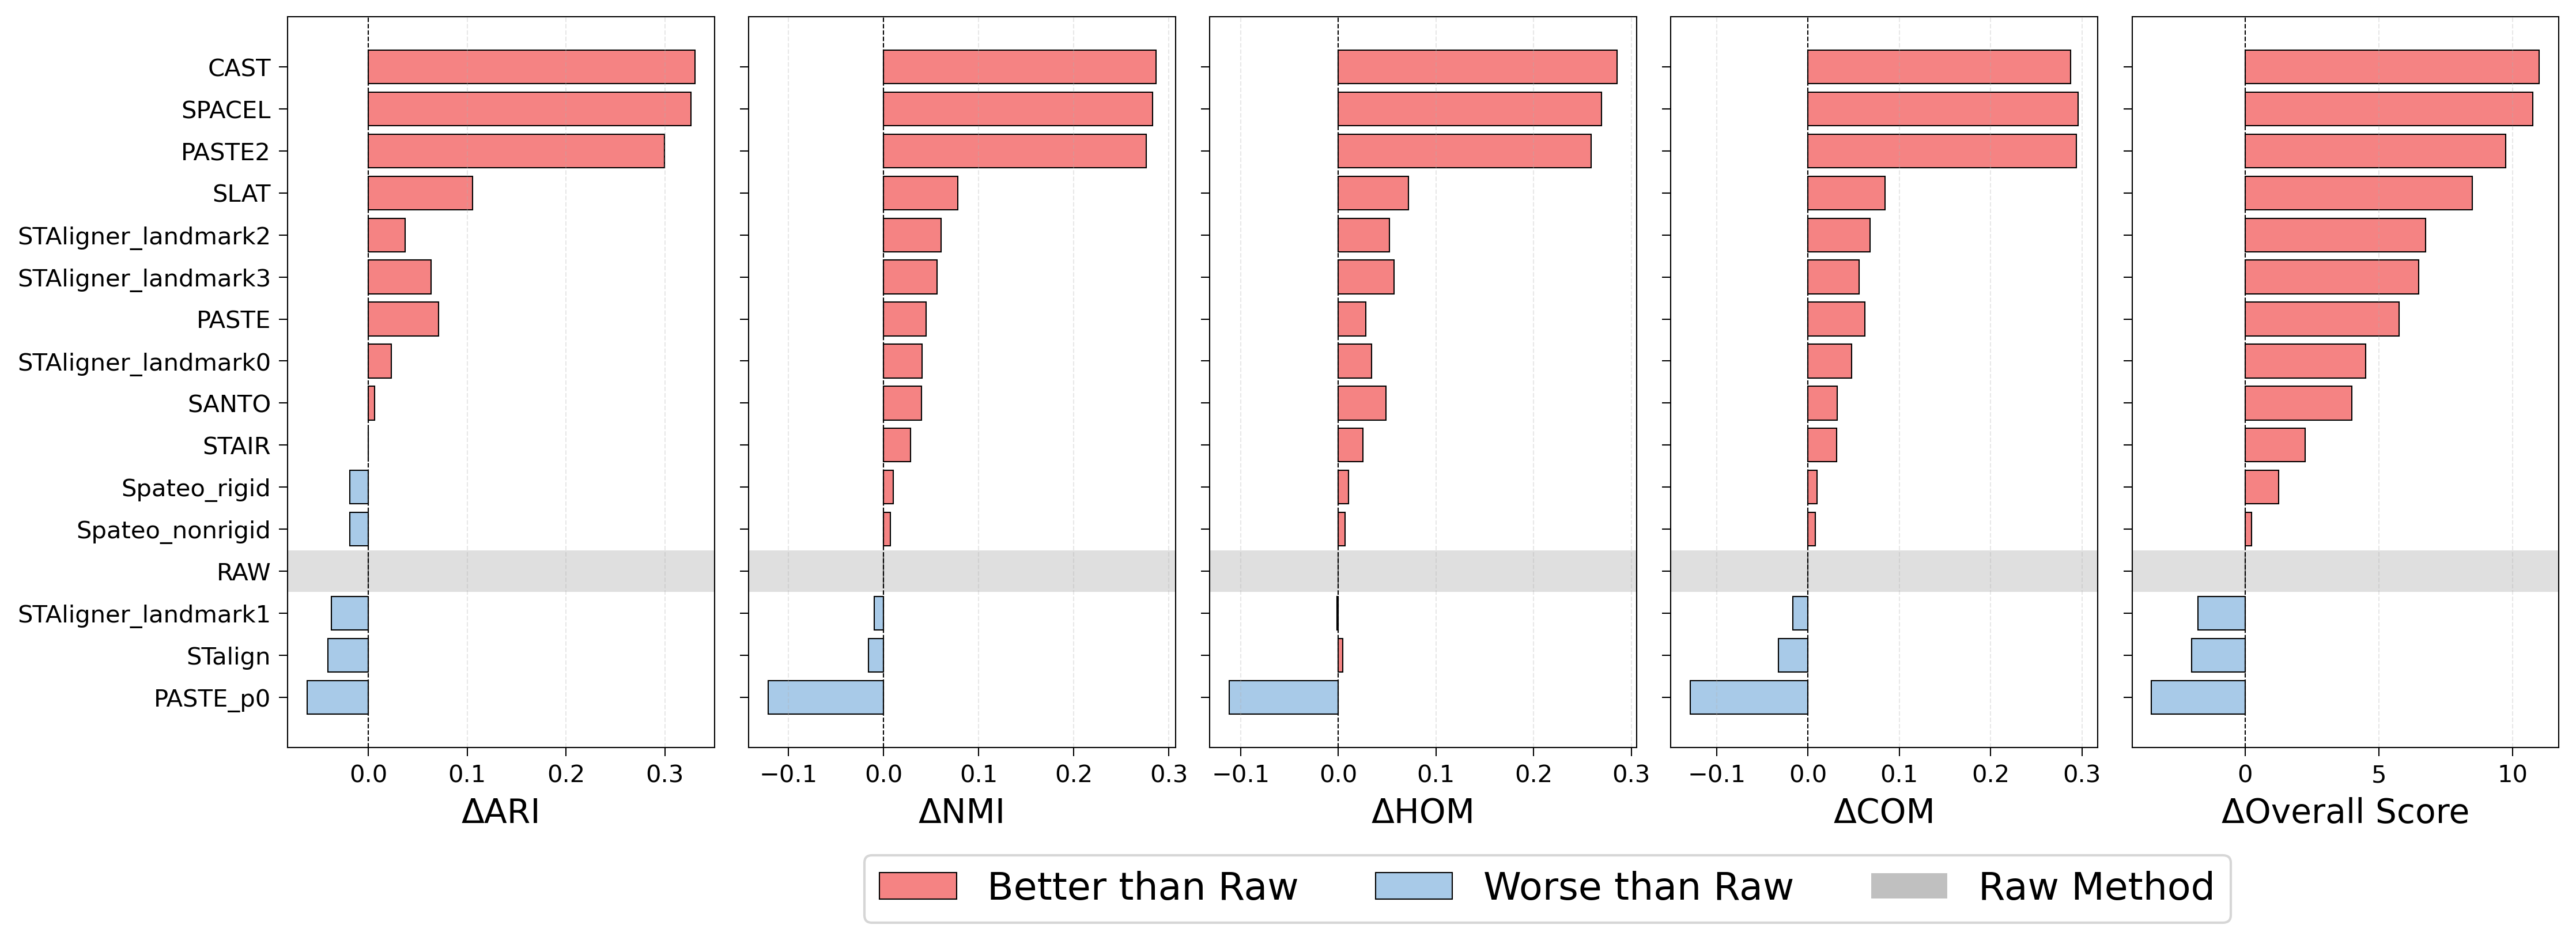

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True, dpi=300)
metrics = ["ARI", "NMI", "HOM", "COM", "Overall Score"]
data_list = [ari_diff_sorted, nmi_diff_sorted, hom_diff_sorted, com_diff_sorted, mean_rank_diff_sorted]

better_color = '#F58383'  # better
worse_color = '#A8CAE8'   # worse
raw_bg_color = '#C0C0C0'  

for ax, metric, data in zip(axes, metrics, data_list):
    colors = [better_color if val > 0 else worse_color for val in data]
    
    bars = ax.barh(data.index, data, color=colors, 
                   edgecolor='black', linewidth=0.5) 
    
    raw_pos = list(data.index).index(baseline_name)
    ax.axhspan(raw_pos-0.5, raw_pos+0.5, facecolor=raw_bg_color, alpha=0.5)
    
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5) 
    
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    
    ax.tick_params(axis='both', which='both', width=0.5)    
    ax.set_xlabel(f'Δ{metric}', fontsize=14)   
    ax.grid(axis='x', linestyle='--', alpha=0.3, linewidth=0.5)  

legend_elements = [
    Patch(facecolor=better_color, edgecolor='black', label='Better than Raw', linewidth=0.5),
    Patch(facecolor=worse_color, edgecolor='black', label='Worse than Raw', linewidth=0.5),
    Patch(facecolor=raw_bg_color, edgecolor='white', label='Raw Method', linewidth=0.5)
]

fig.legend(handles=legend_elements, loc='lower center', 
           ncol=3, bbox_to_anchor=(0.6, -0.1), fontsize=16)

plt.tight_layout()
plt.show()